# Assignment 8 - Linear Regression

## Problem statement 1
The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## 1. Business Problem

1.1 What is the business objective?
- Build a Simple Linear Regression model to predict salary using years of experience.

- Apply multiple transformations (logarithmic, exponential, polynomial) and assess model performance.

- Use metrics like RMSE, R-squared, and correlation coefficient to compare models.

- Provide the HR team with a data-driven tool to automate and justify salary hike estimations.

1.2 Are there any constraints?
- The dataset may only have two features, limiting model complexity.

- Assumes a consistent and transformable relationship between experience and salary.

- Results may vary based on outliers or skewed distributions.

- The model doesn't account for other influential factors like role, department, or performance.

## 2.Data Dictionary
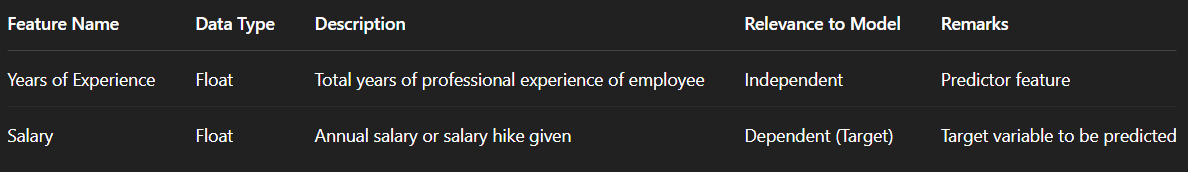

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the data
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

## 3.Data Preprocessing

In [5]:
data.dtypes


YearsExperience    float64
Salary             float64
dtype: object

In [6]:

#Check for null values
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

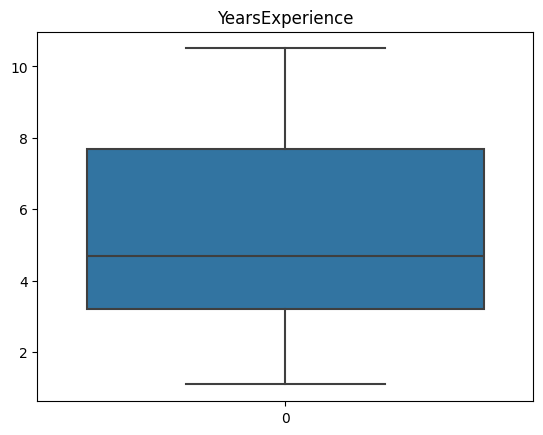

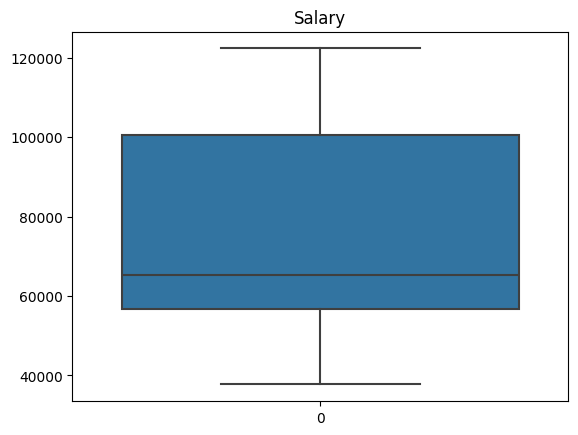

In [9]:
# Check for outliers
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [8]:
# Descriptive statistics
data.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


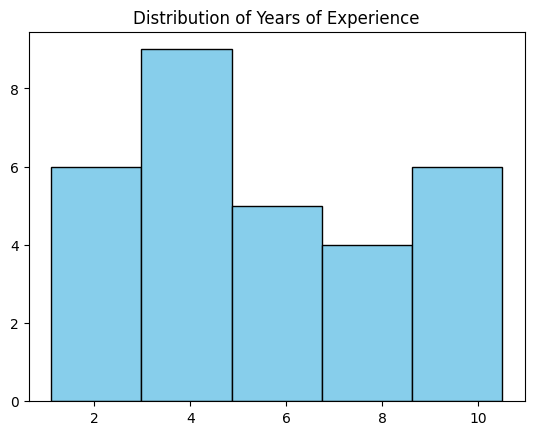

In [10]:
# Univariate Analysis
plt.hist(data['YearsExperience'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Years of Experience")
plt.show()

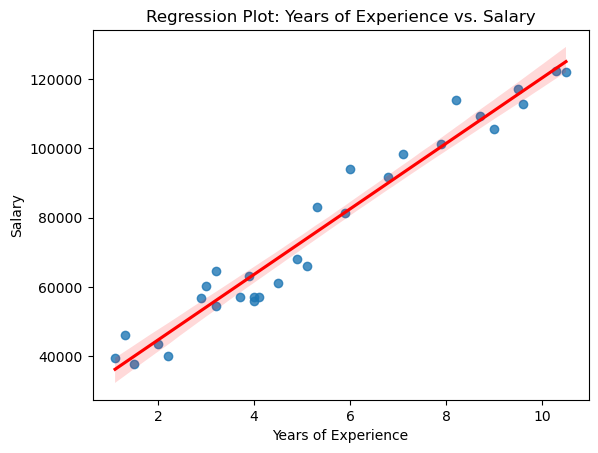

In [9]:
# Bivariate Analysis
# Scatter plot with regression line
sns.regplot(x=data['YearsExperience'], y=data['Salary'], line_kws={"color": "red"})
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Regression Plot: Years of Experience vs. Salary")
plt.show()

In [21]:
#correlation matrix
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## 4.Model Building

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = data[['YearsExperience']]
y = data['Salary']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


In [17]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')


Simple Linear Regression - RMSE: 7059.04362190151, R-Squared: 0.9024461774180497


In [18]:
# Apply different transformations and calculate RMSE and correlation coefficient for each model

# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')


Log Transformation - RMSE: 9196.064796874722, R-Squared: 0.8344395471211846


In [19]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 7247.6145295383185, R-Squared: 0.8971645780890871


In [20]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Simple Linear Regression with RMSE: 7059.04362190151 and R-Squared: 0.9024461774180497


#benefits:
Efficiency and Consistency: Ensure a consistent and efficient process for determining salary hikes, reducing manual errors and biases
Employee Motivation: Provide timely and justified salary hikes